# Diccionarios, JSONs y Analísis Estadísticos de Datos
## Reto 06
### Dr. Antonio Arista Jalife.
Genera un análisis estadístico de datos (EDA), basado en un archivo de JSON.

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

with open('Estaciones de bicicletas.json','rt') as archivo:
    json_bicicletas = json.load(archivo)
json_bicicletas

[{'datasetid': 'estaciones-de-ecobici',
  'recordid': '7d6a85880ee2402aeee40d9590910bbc6ebd7cf2',
  'fields': {'districtcode': '1',
   'nearbystations_0': 432,
   'name': '443 BRUNO TRAVEN-GOLONDRINAS',
   'districtname': 'Ampliación Granada',
   'zipcode': '3340',
   'location_lat': 19.359655,
   'punto_geo': [19.359655, -99.162025],
   'addressnumber': 'S/N',
   'stationtype': 'BIKE',
   'nearbystations_2': 444,
   'nearbystations_1': 442,
   'location_lon': -99.162025,
   'id': 443,
   'address': '443 - Bruno Trave-Avenida México-Coyoacan'},
  'geometry': {'type': 'Point', 'coordinates': [-99.162025, 19.359655]},
  'record_timestamp': '2018-11-12T17:10:11-06:00'},
 {'datasetid': 'estaciones-de-ecobici',
  'recordid': '09d4f3cf20ef0636a24567db330a99d0a9004e63',
  'fields': {'districtcode': '1',
   'nearbystations_0': 390,
   'name': '416 RECREO-PARROQUÍA',
   'districtname': 'Ampliación Granada',
   'zipcode': '3104',
   'location_lat': 19.371308,
   'punto_geo': [19.371308, -99.1776

In [5]:
   
#Normalización del JSON. Esto lo veremos cuando aprendamos a limpiar datos.
json_norm_bicicletas = pd.io.json.json_normalize(json_bicicletas)
dataframe_biciestaciones = pd.DataFrame(json_norm_bicicletas)
df_estaciones = dataframe_biciestaciones[['fields.name','fields.location_lat','fields.location_lon','fields.nearbystations_0']]
df_estaciones.head(5)
dataframe_biciestaciones

<ipython-input-5-241efab6c895>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_norm_bicicletas = pd.io.json.json_normalize(json_bicicletas)


,datasetid,recordid,record_timestamp,fields.districtcode,fields.nearbystations_0,fields.name,fields.districtname,fields.zipcode,fields.location_lat,fields.punto_geo,...,fields.nearbystations_2,fields.nearbystations_1,fields.location_lon,fields.id,fields.address,geometry.type,geometry.coordinates,fields.nearbystations_3,fields.nearbystations_5,fields.nearbystations_4
0,estaciones-de-ecobici,7d6a85880ee2402aeee40d9590910bbc6ebd7cf2,2018-11-12T17:10:11-06:00,1,432,443 BRUNO TRAVEN-GOLONDRINAS,Ampliación Granada,3340,19.359655,"[19.359655, -99.162025]",...,444.0,442.0,-99.162025,443,443 - Bruno Trave-Avenida México-Coyoacan,Point,"[-99.162025, 19.359655]",NaN,NaN,NaN
1,estaciones-de-ecobici,09d4f3cf20ef0636a24567db330a99d0a9004e63,2018-11-12T17:10:11-06:00,1,390,416 RECREO-PARROQUÍA,Ampliación Granada,3104,19.371308,"[19.371308, -99.177607]",...,415.0,391.0,-99.177607,416,416 - Recreo-Parroquía,Point,"[-99.177607, 19.371308]",NaN,NaN,NaN
2,estaciones-de-ecobici,03473d69d0cc8c888e16082d53cb937bb476ff05,2018-11-12T17:10:11-06:00,1,433,440 REAL DE MAYORAZGO-PUENTE XOCO,Ampliación Granada,3330,19.360650,"[19.36065, -99.168669]",...,441.0,439.0,-99.168669,440,440 - Real De Mayorazgo-Puente Xoco,Point,"[-99.168669, 19.36065]",NaN,NaN,NaN
3,estaciones-de-ecobici,3c4dec61a4efe285ae1bebfa8e1c7368cc4c7e30,2018-11-12T17:10:11-06:00,1,11,12 RIO LERMA-VILLALONGIN,Ampliación Granada,06500,19.432313,"[19.432313, -99.161597]",...,20.0,19.0,-99.161597,12,012 - Río Lerma - Villalongin,Point,"[-99.161597, 19.432313]",85.0,NaN,NaN
4,estaciones-de-ecobici,8894dca667abb6c1e9b3bf5cad88ddb4ed05f02c,2018-11-12T17:10:11-06:00,1,29,41 REFORMA-AV. DE LA REPUBLICA,Ampliación Granada,06700,19.435637,"[19.435637, -99.150137]",...,NaN,NaN,-99.150137,41,041 - Reforma - Av. de la República,Point,"[-99.150137, 19.435637]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,estaciones-de-ecobici,a471c61adcdee7781cfed6aed3a3a8a010cb464c,2018-11-12T17:10:11-06:00,1,334,347 PENNSYLVANIA-MAXIMINO AVILA CAMACHO,Ampliación Granada,3710,19.384378,"[19.384378, -99.176097]",...,348.0,346.0,-99.176097,347,347 - Pennsylvania-Maximino Avila Camacho,Point,"[-99.176097, 19.384378]",NaN,NaN,NaN
476,estaciones-de-ecobici,afafd8ae0102e5a79509255b1819e5e80a1eeb5d,2018-11-12T17:10:11-06:00,1,378,379 DR. ROBERTO GAYOL-MIGUEL LAURENT,Ampliación Granada,3104,19.375751,"[19.375751, -99.17084]",...,395.0,380.0,-99.170840,379,379 - Dr. Roberto Gayol-Miguel Laurent,Point,"[-99.17084, 19.375751]",NaN,NaN,NaN
477,estaciones-de-ecobici,f59590832fccf876ba6376318e774a037006166e,2018-11-12T17:10:11-06:00,1,401,402 UXMAL-MUNICIPIO LIBRE,Ampliación Granada,3310,19.370945,"[19.3709452, -99.1587223]",...,405.0,403.0,-99.158722,402,402 - Uxmal-Municipio Libre,Point,"[-99.1587223, 19.3709452]",NaN,NaN,NaN
478,estaciones-de-ecobici,f2da42fcd15f65d7d65f52995b4bb97e207f851f,2018-11-12T17:10:11-06:00,1,12,19 REFORMA-RIO RHIN,Ampliación Granada,06500,19.429241,"[19.429241, -99.163377]",...,27.0,20.0,-99.163377,19,019 - Reforma - Río Rhin,Point,"[-99.163377, 19.429241]",NaN,NaN,NaN


Análisis estadístico de datos: EDA
Maxima latitud: 19.446073
Minima latitud: 19.35827
Maxima longitud: -99.130918
Minima longitud: -99.212845
Latitud promedio:19.40964677416667
Longitud promedio:-99.17091768453243
Estaciones mas céntricas (por histograma):
Estacion mas céntrica:


0    176
dtype: int64

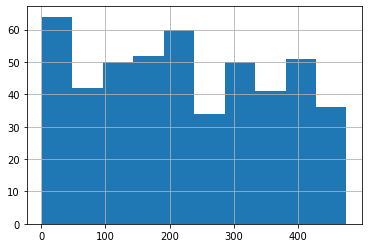

In [6]:
print("Análisis estadístico de datos: EDA")
print("Maxima latitud: "+str(df_estaciones['fields.location_lat'].max()))
print("Minima latitud: "+str(df_estaciones['fields.location_lat'].min()))
print("Maxima longitud: "+str(df_estaciones['fields.location_lon'].max()))
print("Minima longitud: "+str(df_estaciones['fields.location_lon'].min()))
print("Latitud promedio:"+str(df_estaciones['fields.location_lat'].mean()))
print("Longitud promedio:"+str(df_estaciones['fields.location_lon'].mean()))

print("Estaciones mas céntricas (por histograma):")
binsToUse = df_estaciones['fields.nearbystations_0'].max()
df_estaciones['fields.nearbystations_0'].hist(bins = 10)
print("Estacion mas céntrica:")
df_estaciones['fields.nearbystations_0'].mode()